### Small Descrition about the DataSet

In [27]:
# Importing all the necessary Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from scipy.stats import boxcox 


df = pd.read_csv('../../INNOMATICS_TASK/data.csv', index_col=False)
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [3]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [4]:
print('\n\nShape of the Data Set :',df.shape)



Shape of the Data Set : (50, 7)


<h2>MEAN</h2>

<p>Mean is an essential concept in Mathematics and Statistics. It is the Average value in a collection of numbers.
In Statistics, Mean is a Measure of Central Tendency of a Probability Distribution, also known as Expected value.

There are different ways of measuring the central tendency of a list of values. There are multiple ways to calculate the mean.
Two most popular ways are Arithmetic Mean and Geometric Mean, but in most of the cases we generally use Arithmetic Mean.

<b>Arithmetic Mean: </b>It is the sum of all values in a collection of numbers divided by the total number in the collection. </p>

<p><b>Formula : </b></p>

A=[1,2,3,4,5] <br>
<br>
<b>Mean : $$\mu =  \frac{\sum_{i=0}^{n} Ai}{Length(A)} $$</b>
In this case : <b>$$\mu =  \frac {1+2+3+4+5}{5}  =  \frac {15}{5} = 3 $$</b>

In [10]:
# With Library Function

print('Mean :' ,'\n')
print(df.mean())

Mean : 

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64


In [9]:
# Without library Function, using a single Feature

income = [i for i in df['Mthly_HH_Income']]
print('Mean :', sum(income)/len(income))

Mean : 41558.0


### MEDIAN

<p>Median is the Middle Number of a Sorted Data Set. <br>
If the no. of elements is <b>ODD</b>, 
    First, list the elements in ascending order, then take the Middle Value from that, which will be the Median.<br>
If the no. of elements is <b>EVEN</b>,
    List the elements in Ascending order, then first take the Middle Two Numbers, then calculate the Mean of that two numbers, that will be the Median. </p>

In [7]:
# Without library function

income = [i for i in df['Mthly_HH_Income']]
income.sort()

if len(income)%2 != 0:
    print('Median (Odd) :', income[len(income)//2])
else:
    m = [income[(len(income)//2) - 1] , income[len(income)//2]]
    print('Median (Even) :', sum(m)/len(m))

Median (Even) : 35000.0


In [11]:
# With Library Function

print('\nMedian :','\n')
print(df.median())


Median : 

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64


### MODE

<p>This is an another Measure of Central Tendency in Statistics. Mode is the <b>Most Frequent Value/Values</b> among a group of Values.</p>

In [12]:
# Without Library Function

maxx=0
mode = []
income = [i for i in df['Mthly_HH_Income']]
for i in income:
    if income.count(i) > maxx:
        maxx = income.count(i)
        
for i in income:
    if income.count(i) == maxx and i not in mode:
        mode.append(i)
print('Mode :', mode)

Mode : [45000]


In [13]:
# With Library Function

print('\nMode :' ,'\n')
df.mode()


Mode : 



,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,45000,25000,4,0,590400,Graduate,1


### VARIANCE

<p>The Average of the Squared Differences from the Mean. Also known as Measure of Spread i.e. how the Data is spread around the Mean.<br> 
To calculate the Variance, <br>
1. Calculate the Mean <br>
2. Then for each number, subtract the Mean and square the result <br>
3. Then Calculate Mean of those Squared differences. </p>

<b>Formula :</b>

The Variance of the 'Population' : 
    $$ \sigma^2 =\frac {\sum_{i=1}^{n} (x_i - \mu_x)^2} {n} $$
    Where 
    $$ x_i = i^{th} \; Datapoint   $$ 
    $$ \mu_x = \; Mean \; of \; all \; Datapoints $$ 
    $$ n= \; Number \; of Datapoints $$

In [14]:
# Without Library Function

income = [i for i in df['Mthly_HH_Income']]
mean =  sum(income)/len(income)
sq_diff = [(i-mean)**2 for i in income]
variance = sum(sq_diff)/len(sq_diff)
print('Variance :', variance)

Variance : 667478836.0


In [15]:
# With Library Function

print('Variance :', '\n')
df.var()

Variance : 



Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

### STANDARD DEVIATION

<p>The Standard Deviation is a Measure of how Spread out the Numbers are. It is the <b>Square Root of the Variance.</b><br>

A low standard deviation indicates that the values tend to be close to the mean of the data set,while a high standard 
deviation indicates that the values are spread out over a wider range.</p>

<p><b>Formula : <b>
$$ \sigma =\sqrt{\frac {\sum_{i=1}^{n} (x_i - \mu_x)^2} {n}} $$ <br>
where $$ x_i \;= \; i^{th} \; point \; in \; the \; data \; set $$
$$ \mu_x \;\; = \; \;The \; mean \; value \; of \; the \; data \; set $$
$$ n \; = \; Total \; number \; of \; data \; points \; in \; the \; data \; set $$ </p>

In [13]:
# Without Library Function

income = [i for i in df['Mthly_HH_Income']]
mean =  sum(income)/len(income)
sq_diff = [(i-mean)**2 for i in income]
variance = sum(sq_diff)/len(sq_diff)
std_dev = variance ** 0.5

print('Standard Deviation :', std_dev)

Standard Deviation : 25835.611779092826


In [16]:
# With Library Function

print('Standard Deviation :', '\n')
print(df.std())

Standard Deviation : 

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64


### CORRELATION

<P>It is the relationships between two or more variables (or features) of a dataset. When two sets of data are strongly 
linked together we say they have a High Correlation.
<br>
Correlation is <b>Positive</b> when the values increase together, and <br>
Correlation is <b>Negative</b> when one value decreases as the other increases.

Correlation can have a value:

<b>1</b> is a perfect positive correlation <br>
<b>0</b> is no correlation (the values don't seem linked at all) <br>
<b>-1</b> is a perfect negative correlation and between them. </p>

<p>Correlation used only in Linear Relationship : <br>
   Formula : <br>
   $$ \rho_x,_y = \frac{{}\sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y)}
{\sqrt{\sum_{i=1}^{n} (x_i - \mu_x)^2 \sum_{i=1}^n(y_i - \mu_y)^2}} $$

In [17]:
# Without Library Function

x = [i for i in df['Mthly_HH_Income']]
y = [i for i in df['Mthly_HH_Expense']]

x_mean = sum(x) / len(x)
y_mean = sum(y) / len(y)

cov_xy = [(i - x_mean) * (j - y_mean) for i,j in zip(x, y)]
cov_xy = sum(cov_xy) / len(cov_xy)

x_std = (sum([(i - x_mean)**2 for i in x]) / len(x)) ** 0.5
y_std = (sum([(i - y_mean)**2 for i in y])/len(y)) ** 0.5

correlation = cov_xy / (x_std * y_std)

print('Pearson Correlation Coefficient :', correlation)

Pearson Correlation Coefficient : 0.6492152549316462


In [47]:
# With Library Function

x = df['Mthly_HH_Income']
y = df['Mthly_HH_Expense']

print('Pearson Correlation Coefficient :', stats.pearsonr(x,y)[0])

Pearson Correlation Coefficient : 0.6492152549316461


### NORMAL DISTRIBUTION & ITS FEATURES

In probability theory, a Normal Distribution is a type of continuous probability distribution for a real-valued random variable.

Data can be "distributed" (spread out) in different ways. But there are many cases where the data tends to be around a central 
value with no bias left or right, and it gets close to a "Normal Distribution" like this: 
    
The "Bell Curve" is a Normal Distribution.

The Normal Distribution has:

1. Bell Shaped Curve
2. Symmetry about the centre
3. 50% of values less than the mean and 50% greater than the mean
4. Mean = Median = Mode
5. It follows 68-95-99.7 % Rule : 
        68% of data is going to lie in the first Standard Deviation away from the Mean.
        95% of data is going to lie in the first Standard Deviation away from the Mean.
        99.7% of data is going to lie in the first Standard Deviation away from the Mean.
        

<AxesSubplot:ylabel='Density'>

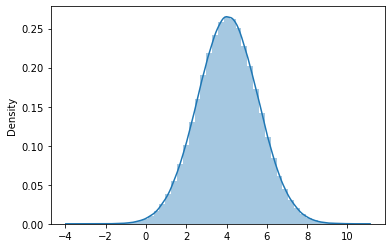

In [9]:
import warnings
warnings.filterwarnings('ignore')

mean = np.mean(df['No_of_Fly_Members'])
std = np.std(df['No_of_Fly_Members'])

norm = np.random.normal(mean, std,1000000)

# Mean = 0, SD = 2.
sns.distplot(norm)

### POSITIVELY SKEWED & NEGATIVE SKEWED NORMAL DISTRIBUTION

In a Distribution if one tail is longer than other tail then it is skew.Skewness also called as assymmetric distributions as they don't show any kind of symmetric properties but normal distribution show the symmetric property<br>
<b><i>Symmetric means one tail is the mirror image of other half.</i></b><br>

A left long tail known as left-skewed distribution also known  as <b>Negatively Skewed</b> Normal Distribution  & <br>
A right long tail distribution known as right-skewed distribution also known as <b>Positively Skewed</b> Normal Distribution.

1. If skewness is less than -1 or greater than 1, the distribution is <b>Highly Skewed.</b> <br>
2. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is <b>Moderately Skewed.</b> <br>
3. If skewness is between -0.5 and 0.5, the distribution is <b>Approximately Symmetric.</b>

In [14]:
print('Skewness for each column :')
df.skew()

Skewness for each column :


Mthly_HH_Income          0.924615
Mthly_HH_Expense         1.199461
No_of_Fly_Members        0.113674
Emi_or_Rent_Amt          3.403680
Annual_HH_Income         1.192949
No_of_Earning_Members    1.593301
dtype: float64

#### From the above we can see that all are Positively Skewed but the Emi_or_Rent_Amt column is Highly Skewed.

<AxesSubplot:ylabel='Density'>

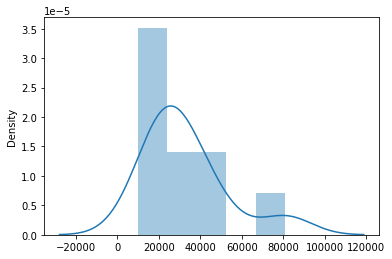

In [21]:
# We are plotting the distribution plot for the first column : Mthly_HH_Income

import warnings
warnings.filterwarnings('ignore')

mean = np.mean(df['Mthly_HH_Income'])
std = np.std(df['Mthly_HH_Income'])

# Plot between -10 and 10 with .001 steps.
x_axis = np.random.normal(mean, std,10)
# Mean = 0, SD = 2.
sns.distplot(x_axis)


#### It is Right Skewed.

### EFFECT ON MEAN, MEDIAN & MODE DUE TO SKEWNESS

Among the three measures of central tendancy mean is highly effected by the skewness.For distributions that has outliers we often choose median as a prefer tendency because median is more resistance than mean, that means that if the add anyt outliers in it then there will be a huge change in mean than median. If we see that the distribution is skewed to the left that means that the mean is less than median,which is often less than the mode. if the distribution is skewed to the right that means the mode is less than the median which is often less than the mean.

### Explain QQ PLOT and show the implementation of the same


Q-Q plots also known as Quantile-Quantile plot is plots of two quantiles against each other.The main objective of this plot is to check wheather two sets of data come from the same distribution. We can simply tell the type of distribution by looking at the graph of Q-Q plot

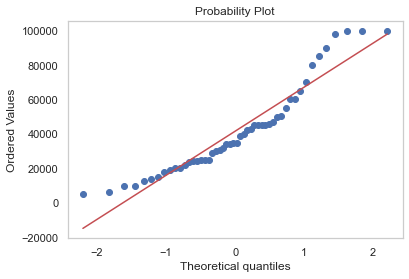

In [26]:
stats.probplot(df['Mthly_HH_Income'], dist="norm", plot=plt)

plt.grid()

### Explain Box Cox and show the implementation of the same

A box-cox plot is basically used to convert the non-normally distributed dataset into the normally distributed dataset.


<AxesSubplot:ylabel='Density'>

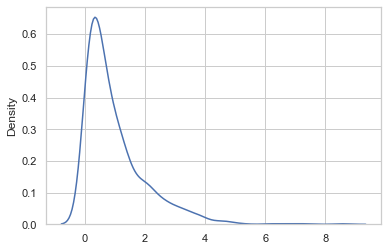

In [28]:
#set seed to 0
np.random.seed(0)

#generate dataset
data = np.random.exponential(size=1000)

#plot the distribution of data values
sns.distplot(data, hist=False, kde=True) 

#### We can see that the data is non-normally distributed. so we need to use the box-cox plot in-order to make it nomally distributed dataset.

<AxesSubplot:ylabel='Density'>

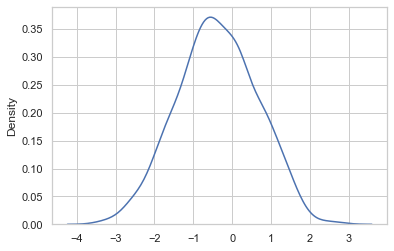

In [29]:
#perform Box-Cox 
transformed_data, best_lambda = boxcox(data) 

#plot the distribution of the transformed data 
sns.distplot(transformed_data, hist=False, kde=True) 